In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Paths
DATA_DIR = Path('../data/processed')
RESULTS_DIR = Path('../results/labeling')

# Load Data
chunks_df = pd.read_csv(RESULTS_DIR / 'chunk_scores_gemini.csv')
videos_df = pd.read_csv(RESULTS_DIR / 'video_scores_aggregate.csv')

print(f"Loaded {len(chunks_df)} labeled chunks")
print(f"Loaded {len(videos_df)} aggregated videos")

Loaded 12170 labeled chunks
Loaded 384 aggregated videos


## 1. Chunk-Level Analysis

Analyzing the raw scores assigned to individual 30-second transcript chunks.

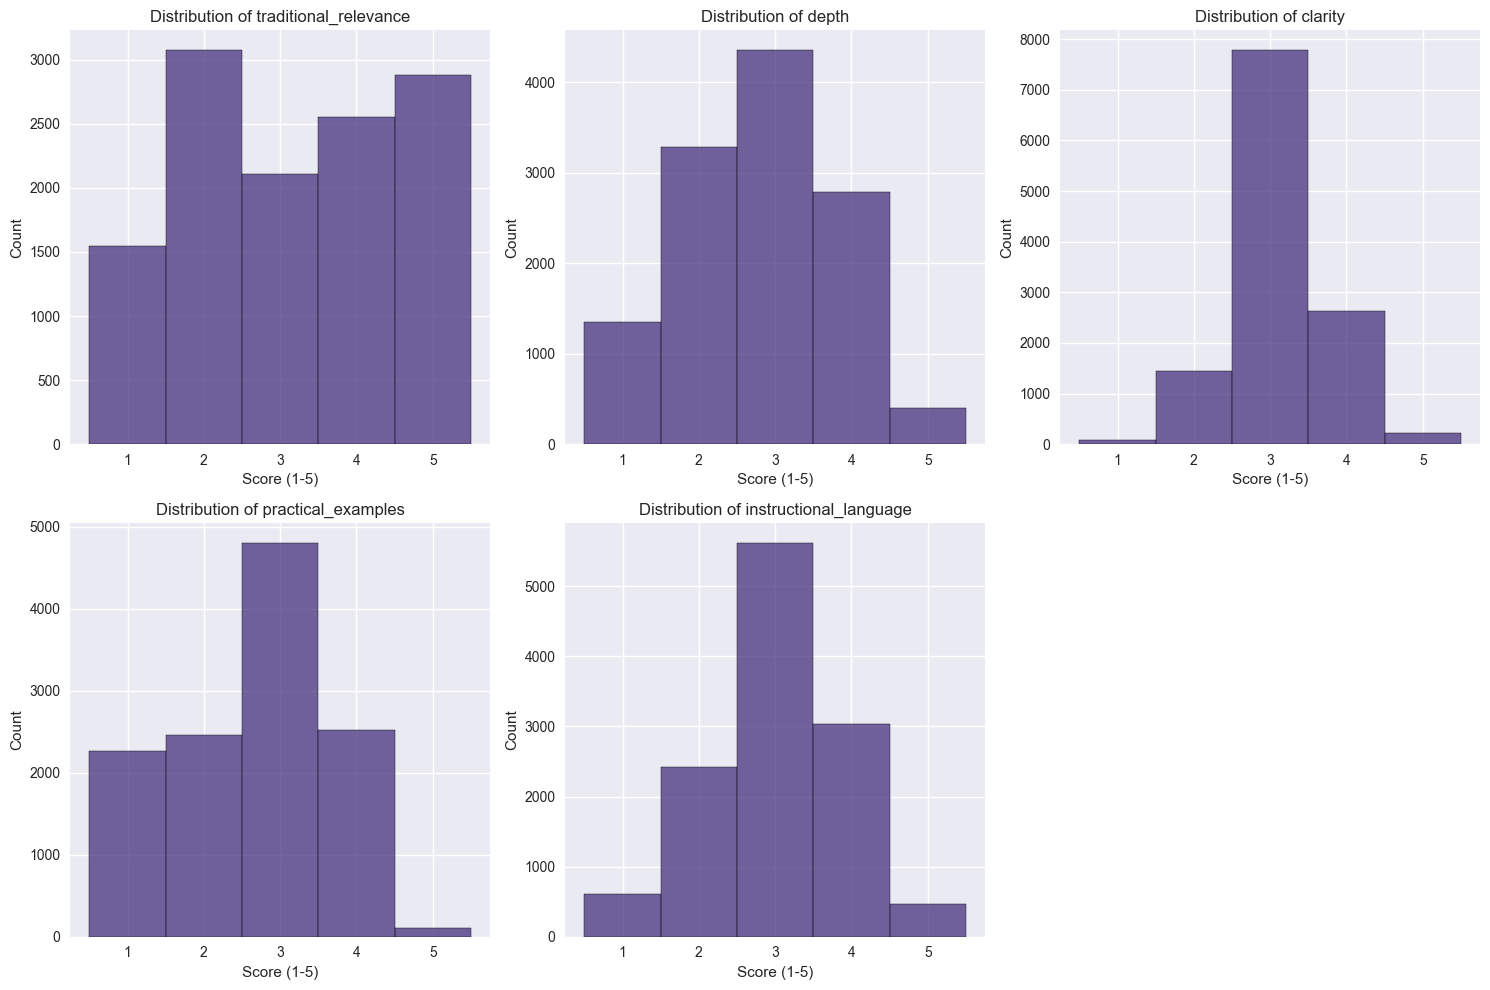

In [2]:
# Score Distributions
score_cols = ['traditional_relevance', 'depth', 'clarity', 'practical_examples', 'instructional_language']

plt.figure(figsize=(15, 10))
for i, col in enumerate(score_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(chunks_df[col], bins=5, kde=False, discrete=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score (1-5)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

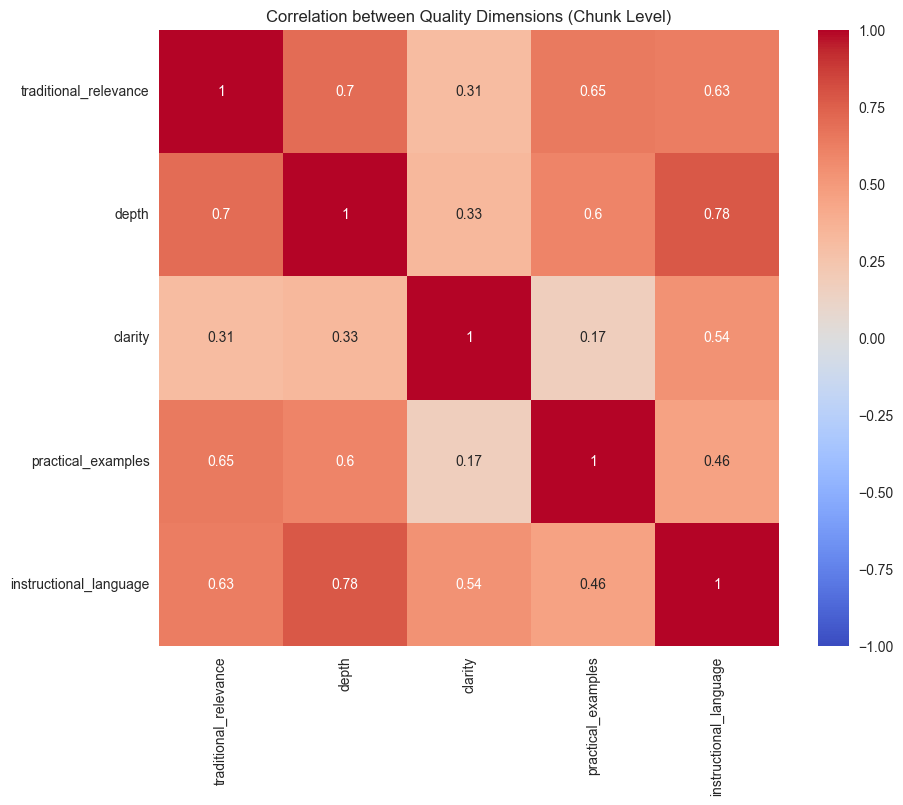

In [3]:
# Correlation between dimensions
plt.figure(figsize=(10, 8))
sns.heatmap(chunks_df[score_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Quality Dimensions (Chunk Level)')
plt.show()

### Scores by Skill
Are some skills harder to find good content for?

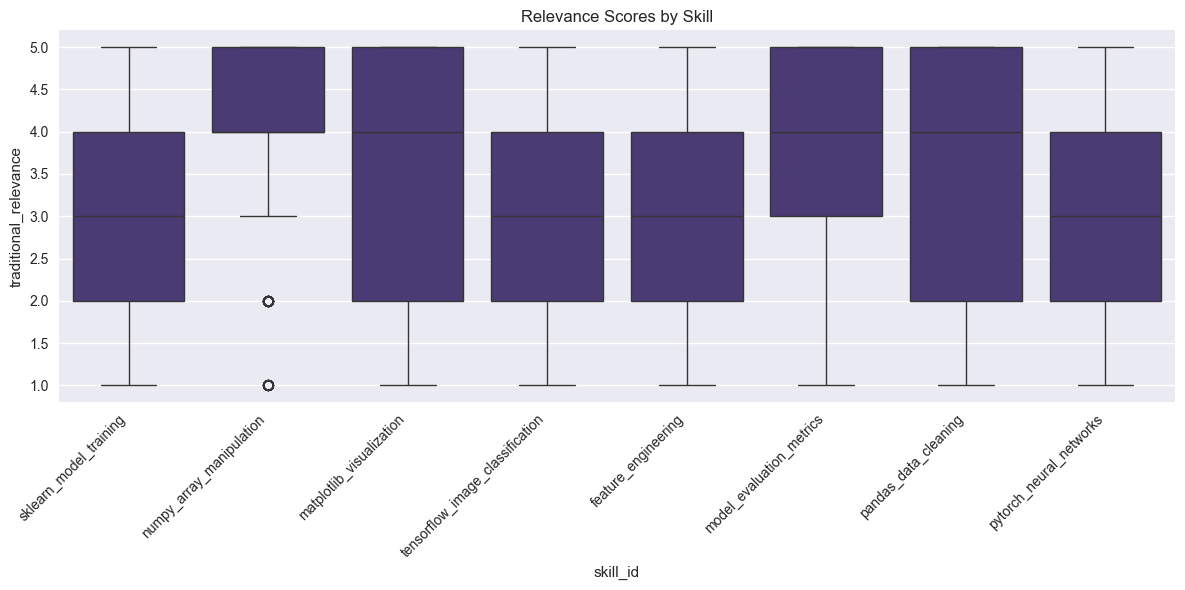

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=chunks_df, x='skill_id', y='traditional_relevance')
plt.xticks(rotation=45, ha='right')
plt.title('Relevance Scores by Skill')
plt.tight_layout()
plt.show()

## 2. Video-Level Analysis (Top-5 Aggregation)

Analyzing the scores after aggregating the top 5 chunks per video. This represents the "Ground Truth" quality of the video.

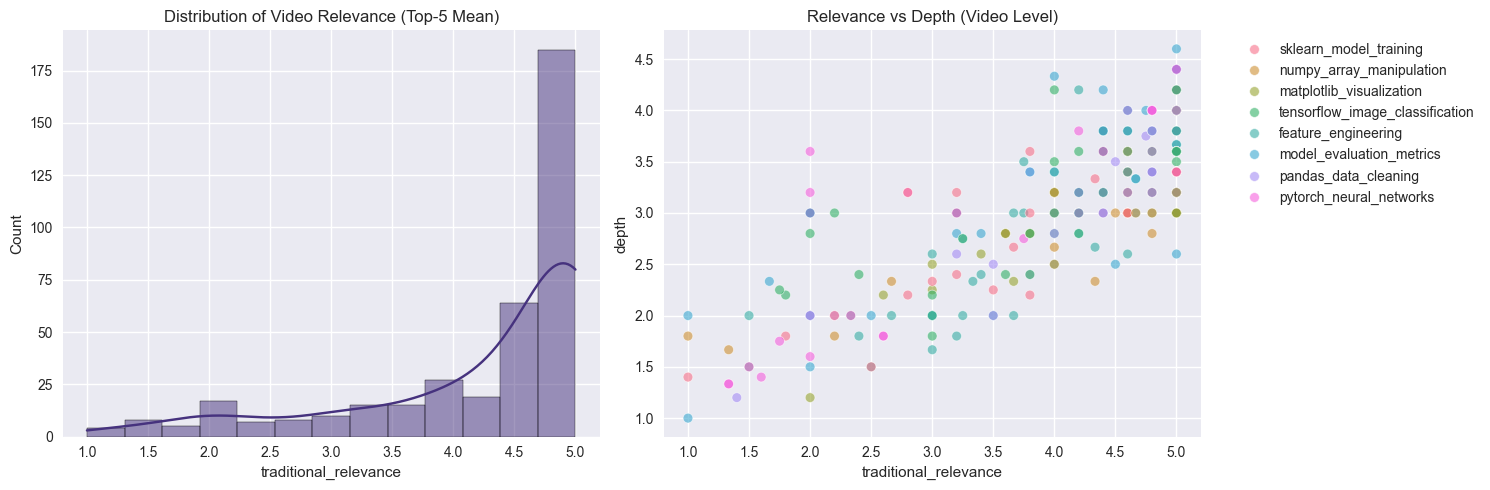

In [5]:
# Distribution of Aggregated Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(videos_df['traditional_relevance'], kde=True)
plt.title('Distribution of Video Relevance (Top-5 Mean)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=videos_df, x='traditional_relevance', y='depth', hue='skill_id', alpha=0.6)
plt.title('Relevance vs Depth (Video Level)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [6]:
# Top Videos per Skill
print("Top 3 Videos per Skill (by Relevance):")
for skill in videos_df['skill_id'].unique():
    print(f"\n--- {skill} ---")
    top_videos = videos_df[videos_df['skill_id'] == skill].sort_values('traditional_relevance', ascending=False).head(3)
    print(top_videos[['video_id', 'traditional_relevance', 'depth', 'chunk_count']].to_string(index=False))

Top 3 Videos per Skill (by Relevance):

--- sklearn_model_training ---
   video_id  traditional_relevance  depth  chunk_count
-8s9KuNo5SA                    5.0    3.4           18
-IvNzmrcyUM                    5.0    3.6           14
0B5eIE_1vpU                    5.0    3.4           81

--- numpy_array_manipulation ---
   video_id  traditional_relevance  depth  chunk_count
1qz7qUM6yUI                    5.0    3.4           67
4c_mwnYdbhQ                    5.0    4.0           38
8JfDAm9y_7s                    5.0    3.0           30

--- matplotlib_visualization ---
   video_id  traditional_relevance  depth  chunk_count
0P7QnIQDBJY                    5.0    4.0           34
0QLJduh1MNM                    5.0    3.2           18
3Xc3CA655Y4                    5.0    3.8           50

--- tensorflow_image_classification ---
   video_id  traditional_relevance  depth  chunk_count
1saRltqot8c                    5.0    3.8          226
44U8jJxaNp8                    5.0    4.2         